In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#import nltk
#from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()#?
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk import data
data.path.append (r"E:\nlp\datana\nltk_data")

In [4]:
pd.pandas.set_option('display.max_rows',None)
#读文件
data = pd.read_csv(r'D:\PycharmProjects\nlp\data\drug_text_data\train_F3WbcTw.csv')
data.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [5]:
print('The size of the dataset is {}'.format(data.shape))
print('Total unique values in unique_hash is {}'.format(len(np.unique(data['unique_hash']))))
#每行唯一

The size of the dataset is (5279, 4)
Total unique values in unique_hash is 5279


In [6]:
data = data.iloc[:,1:4]#索引任意行，第2到4列
data.head()

,text,drug,sentiment
0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,I can completely understand why you’d want to ...,gilenya,2
2,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [7]:
data.drug.value_counts()#对drug进行计数

ocrevus                         676
gilenya                         666
ocrelizumab                     441
entyvio                         303
humira                          270
fingolimod                      238
remicade                        229
opdivo                          224
tarceva                         218
cladribine                      200
keytruda                        199
stelara                         161
tagrisso                        161
alimta                          146
lucentis                         67
eylea                            65
avastin                          52
nivolumab                        50
cimzia                           48
crizotinib                       43
alectinib                        43
vitrectomy                       41
simponi                          39
erlotinib                        35
tecentriq                        34
xalkori                          33
pemetrexed                       33
osimertinib                 

In [8]:
data = data[(data['drug']=='ocrevus')| (data['drug']=='gilenya')|(data['drug']=='ocrelizumab') |(data['drug']=='entyvio')| (data['drug']=='humira')|(data ['drug']=='fingolimod')|(data['drug']=='remicade')|(data['drug']=='opdivo')|(data['drug']=='tarceva')|(data['drug']=='cladribine')]

In [9]:
data['drug'].value_counts()

ocrevus        676
gilenya        666
ocrelizumab    441
entyvio        303
humira         270
fingolimod     238
remicade       229
opdivo         224
tarceva        218
cladribine     200
Name: drug, dtype: int64

In [10]:
# segregating dataframe for analyzing individual condition#将每个药物提出
data_ocrevus = data[(data['drug']=='ocrevus')]
data_gilenya = data[(data['drug']=='gilenya')]
data_ocrelizumab = data[(data['drug']=='ocrelizumab')]
data_entyvio = data[(data['drug']=='entyvio')]
data_humira = data[(data['drug']=='humira')]
data_fingolimod = data[(data['drug']=='fingolimod')]
data_remicade = data[(data['drug']=='remicade')]
data_opdivo = data[(data['drug']=='opdivo')]
data_tarceva = data[(data['drug']=='tarceva')]
data_cladribine = data[(data['drug']=='cladribine')]

Text(0.5, 1.0, 'Word cloud for crevus')

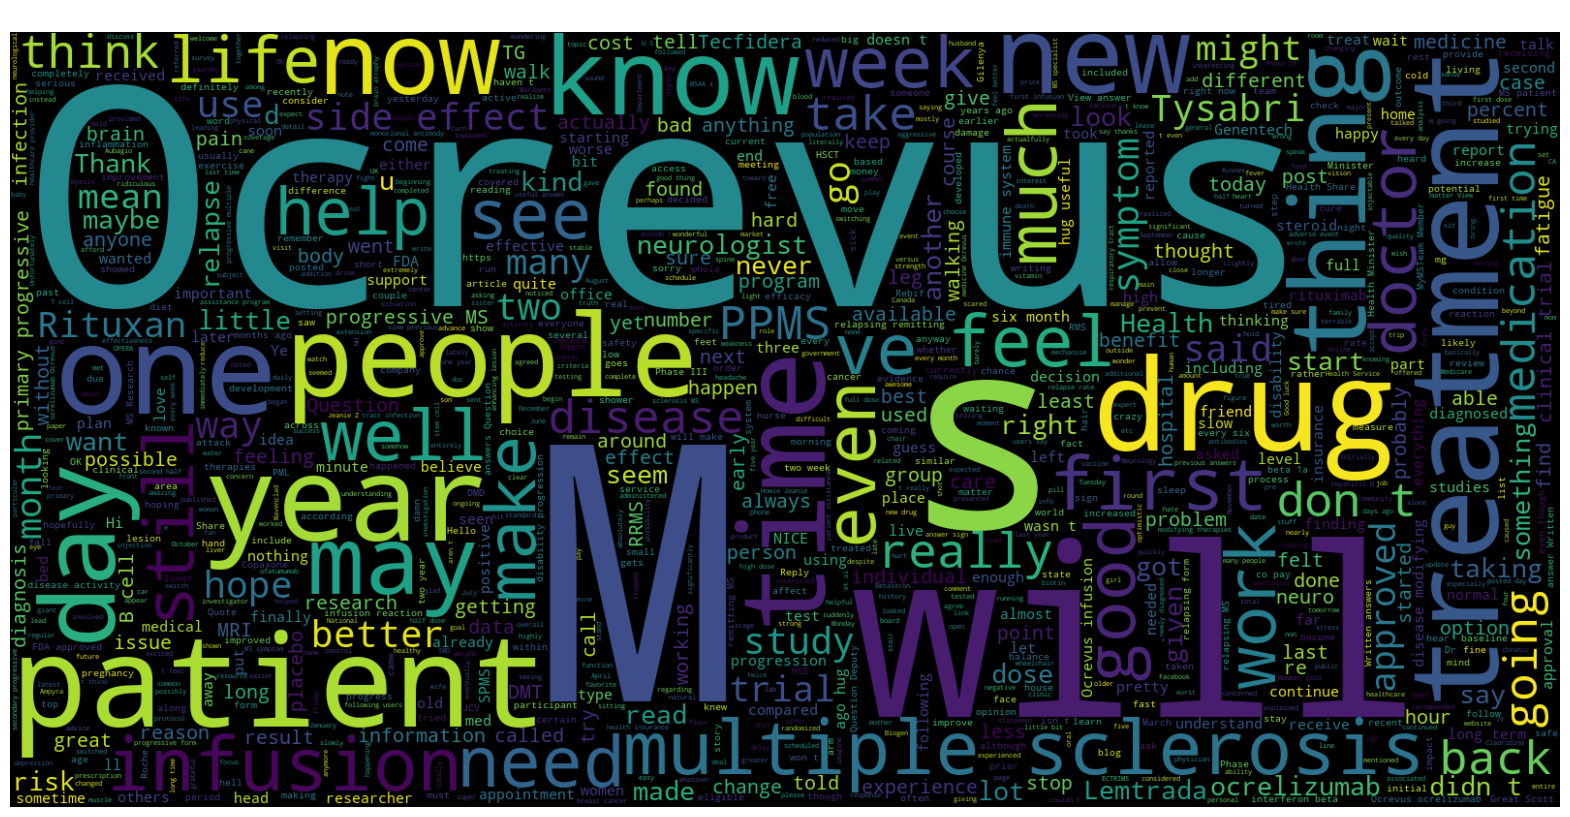

In [11]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data_ocrevus.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis(False)
plt.title('Word cloud for crevus', fontsize=14, c="white")

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
def clean_data(raw_data):
    # 1. Delete HTML 利用bs4库包删除html
    text = BeautifulSoup(raw_data, 'html.parser').get_text()
    # 2. Make a space
    text = re.sub('[^a-zA-Z]', ' ', text)
    # 3. lower letters
    text = text.lower().split()
    # 5. Stopwords 
    meaningful_text = [w for w in text if not w in stop]
    # 6. lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_text]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [14]:
data["updated_text"] = data["text"].apply(clean_data)

D:\local temp\ipykernel_23880\2180477685.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_data, 'html.parser').get_text()


In [15]:
data.head()

,text,drug,sentiment,updated_text
0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune disease tend come cluster gilenya f...
1,I can completely understand why you’d want to ...,gilenya,2,completely understand want try result reported...
2,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting target p receptor rather like fing...
3,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,interesting grand merci wonder lemtrada ocrevu...
4,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,hi everybody latest mri result brain cervical ...


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit(['ocrevus','gilenya','ocrelizumab','entyvio','humira','fingolimod','remicade','opdivo','tarceva','cladribine'])


In [17]:
x = data['updated_text']
y = le.transform(data['drug'])
print(len(y))

3465


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 2772
Rows in test set: 693


In [19]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=77)
print(f'Rows in train set: {len(x_train)}\nRows in valid set: {len(x_valid)}')

Rows in train set: 2079
Rows in valid set: 693


In [20]:
# n-fold CV n折交叉验证，CountVectorizer类的参数很多，分为三个处理步骤：preprocessing、tokenizing、n-grams generation.

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
cv.fit(x_train)
x_train = cv.transform(x_train).toarray()
x_valid = cv.transform(x_valid).toarray()
x_test = cv.transform(x_test).toarray()

In [22]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [5, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
clf = XGBClassifier(learning_rate= 0.001,
        objective= "multi:softmax",
        random_state= 1,
        num_class = 10)
clf.fit(x_train, y_train,early_stopping_rounds=40,eval_set=[(x_valid,y_valid)])

D:\miniconda3\envs\nlp\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:2.29805
[1]	validation_0-mlogloss:2.29354
[2]	validation_0-mlogloss:2.28905
[3]	validation_0-mlogloss:2.28458
[4]	validation_0-mlogloss:2.28013
[5]	validation_0-mlogloss:2.27570
[6]	validation_0-mlogloss:2.27129
[7]	validation_0-mlogloss:2.26690
[8]	validation_0-mlogloss:2.26253
[9]	validation_0-mlogloss:2.25818
[10]	validation_0-mlogloss:2.25385
[11]	validation_0-mlogloss:2.24954
[12]	validation_0-mlogloss:2.24525
[13]	validation_0-mlogloss:2.24098
[14]	validation_0-mlogloss:2.23672
[15]	validation_0-mlogloss:2.23248
[16]	validation_0-mlogloss:2.22827
[17]	validation_0-mlogloss:2.22406
[18]	validation_0-mlogloss:2.21988
[19]	validation_0-mlogloss:2.21572
[20]	validation_0-mlogloss:2.21157
[21]	validation_0-mlogloss:2.20743
[22]	validation_0-mlogloss:2.20333
[23]	validation_0-mlogloss:2.19923
[24]	validation_0-mlogloss:2.19516
[25]	validation_0-mlogloss:2.19110
[26]	validation_0-mlogloss:2.18705
[27]	validation_0-mlogloss:2.18303
[28]	validation_0-mlogloss:2.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [25]:
y_pred = clf.predict(x_test)
y_pred_train=clf.predict(x_train)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        37
           1       0.81      0.90      0.85        58
           2       0.92      1.00      0.96        49
           3       0.96      1.00      0.98       149
           4       0.74      0.84      0.79        44
           5       1.00      1.00      1.00        78
           6       1.00      1.00      1.00       141
           7       1.00      0.98      0.99        52
           8       0.94      0.67      0.78        43
           9       0.98      1.00      0.99        42

    accuracy                           0.95       693
   macro avg       0.94      0.91      0.92       693
weighted avg       0.95      0.95      0.94       693



In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score (y_test, y_pred))

0.9451659451659452


Text(52.722222222222214, 0.5, 'true')

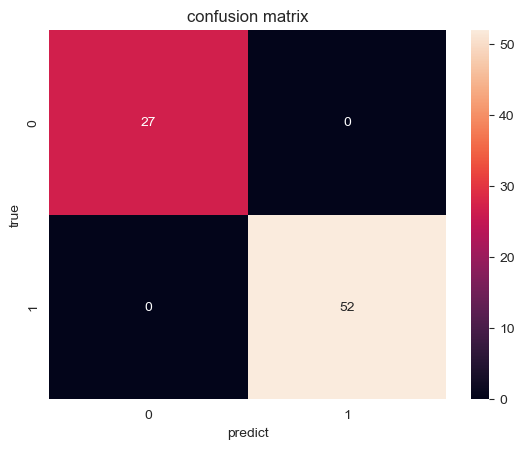

In [28]:
import seaborn as sn
#得到混淆矩阵
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
#转换成dataframe，转不转一样
df_cm = pd.DataFrame(cm)
#annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
ax = sn.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true')

#print(confusion_matrix(y_test, y_pred))

In [29]:
from sklearn import svm

# 训练模型
svms= svm.SVC(kernel='linear',C=0.05)
# svms = svm.SVC(C=1,kernel='linear', degree=3, gamma='scale',coef0=0.0, shrinking=True,probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,random_state=None)

svms.fit(x_train, y_train)


SVC(C=0.05, kernel='linear')

In [30]:
y_pred = svms.predict(x_test)
#y_pred_train=svms.predict(x_train)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.77      0.84      0.80        58
           2       0.90      0.92      0.91        49
           3       0.96      0.97      0.97       149
           4       0.70      0.68      0.69        44
           5       0.93      0.99      0.96        78
           6       0.99      0.96      0.98       141
           7       1.00      0.88      0.94        52
           8       0.76      0.72      0.74        43
           9       0.95      0.95      0.95        42

    accuracy                           0.91       693
   macro avg       0.88      0.87      0.87       693
weighted avg       0.91      0.91      0.91       693



Text(52.722222222222214, 0.5, 'true')

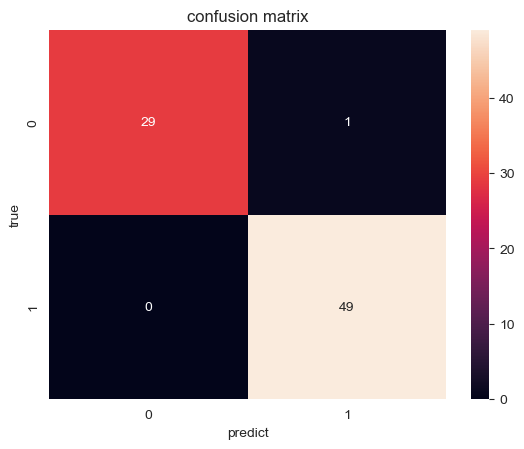

In [32]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
#转换成dataframe，转不转一样
df_cm = pd.DataFrame(cm)
#annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
ax = sn.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true')

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20)
lr.fit(x_train, y_train)


D:\miniconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20)

In [34]:
y_pred = lr.predict(x_test)
#y_pred_train=lr.predict(x_train)


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.75      0.83      0.79        58
           2       0.87      0.80      0.83        49
           3       0.93      0.96      0.94       149
           4       0.78      0.64      0.70        44
           5       0.87      0.95      0.91        78
           6       0.96      0.94      0.95       141
           7       1.00      0.90      0.95        52
           8       0.68      0.74      0.71        43
           9       0.93      0.98      0.95        42

    accuracy                           0.89       693
   macro avg       0.86      0.85      0.86       693
weighted avg       0.89      0.89      0.89       693



Text(52.722222222222214, 0.5, 'true')

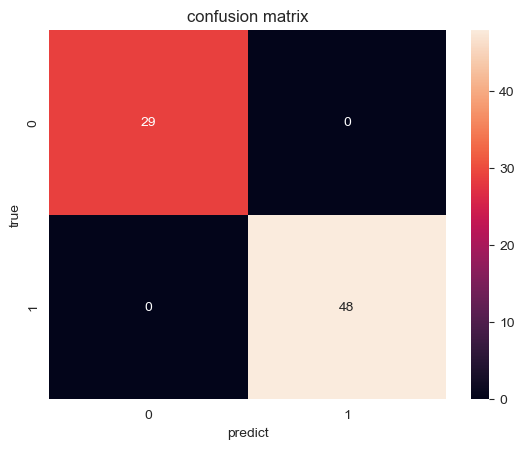

In [36]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
#转换成dataframe，转不转一样
df_cm = pd.DataFrame(cm)
#annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
ax = sn.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true')

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtcf = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=4, min_samples_split=25, random_state=1, splitter='best')
dtcf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=25,
                       random_state=1)

In [38]:
y_pred = dtcf.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        37
           1       0.79      1.00      0.89        58
           2       0.92      0.98      0.95        49
           3       0.96      0.99      0.98       149
           4       0.84      0.82      0.83        44
           5       1.00      1.00      1.00        78
           6       1.00      1.00      1.00       141
           7       1.00      0.92      0.96        52
           8       0.91      0.67      0.77        43
           9       0.98      1.00      0.99        42

    accuracy                           0.95       693
   macro avg       0.93      0.91      0.92       693
weighted avg       0.95      0.95      0.94       693



Text(52.722222222222214, 0.5, 'true')

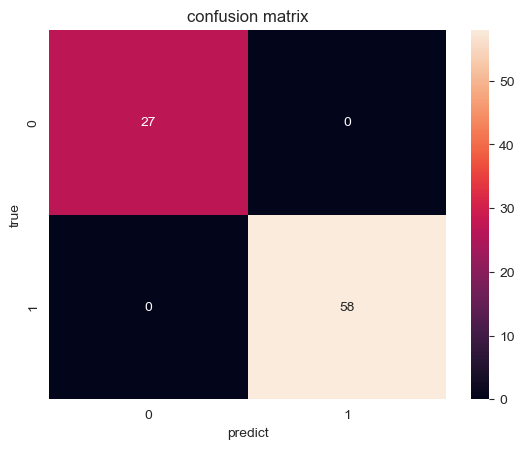

In [40]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
#转换成dataframe，转不转一样
df_cm = pd.DataFrame(cm)
#annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
ax = sn.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true')

In [41]:
'''from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(criterion='entropy',
                              splitter='best',
                              random_state=1
                             )
parameters = {'random_state' : [1],
    "criterion" : ['gini', 'entropy'],
    'max_depth' : range(1, 10),
    'splitter' : ['random', 'best'],
    'min_samples_split' : range(5, 30, 5),
    'min_samples_leaf' : range(1, 5)}
clf = GridSearchCV(clf, parameters)
clf.fit(x_train, y_train)
print("模型的最优参数：",clf.best_params_)
print("最优模型分数：",clf.best_score_)
print("最优模型对象：",clf.best_estimator_)'''

'from sklearn.model_selection import GridSearchCV\nclf = DecisionTreeClassifier(criterion=\'entropy\',\n                              splitter=\'best\',\n                              random_state=1\n                             )\nparameters = {\'random_state\' : [1],\n    "criterion" : [\'gini\', \'entropy\'],\n    \'max_depth\' : range(1, 10),\n    \'splitter\' : [\'random\', \'best\'],\n    \'min_samples_split\' : range(5, 30, 5),\n    \'min_samples_leaf\' : range(1, 5)}\nclf = GridSearchCV(clf, parameters)\nclf.fit(x_train, y_train)\nprint("模型的最优参数：",clf.best_params_)\nprint("最优模型分数：",clf.best_score_)\nprint("最优模型对象：",clf.best_estimator_)'

In [42]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
clf= LogisticRegression()

parameters = {'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']}
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_test, y_test)
print("模型的最优参数：",clf.best_params_)
print("最优模型分数：",clf.best_score_)
print("最优模型对象：",clf.best_estimator_)'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import Pipeline\nclf= LogisticRegression()\n\nparameters = {\'C\':list(np.linspace(0.05,1,19)),\n    \'solver\':[\'liblinear\',\'sag\',\'newton-cg\',\'lbfgs\']}\nclf = GridSearchCV(clf, parameters,cv=5)\nclf.fit(x_test, y_test)\nprint("模型的最优参数：",clf.best_params_)\nprint("最优模型分数：",clf.best_score_)\nprint("最优模型对象：",clf.best_estimator_)'

In [43]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
clf= svm.SVC(kernel='linear',C=0.05)
parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_test, y_test)
print("模型的最优参数：",clf.best_params_)
print("最优模型分数：",clf.best_score_)
print("最优模型对象：",clf.best_estimator_)'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import Pipeline\nclf= svm.SVC(kernel=\'linear\',C=0.05)\nparameters = {\'kernel\': [\'rbf\'], \'gamma\': [1e-3, 1e-4],\'C\': [1, 10, 100, 1000]}\nclf = GridSearchCV(clf, parameters,cv=5)\nclf.fit(x_test, y_test)\nprint("模型的最优参数：",clf.best_params_)\nprint("最优模型分数：",clf.best_score_)\nprint("最优模型对象：",clf.best_estimator_)'

In [44]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
clf= svm.SVC(kernel='linear',C=0.05)
parameters = {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_test, y_test)
print("模型的最优参数：",clf.best_params_)
print("最优模型分数：",clf.best_score_)
print("最优模型对象：",clf.best_estimator_)'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import Pipeline\nclf= svm.SVC(kernel=\'linear\',C=0.05)\nparameters = {\'kernel\': [\'linear\'], \'C\': [1, 10, 100, 1000]}\nclf = GridSearchCV(clf, parameters,cv=5)\nclf.fit(x_test, y_test)\nprint("模型的最优参数：",clf.best_params_)\nprint("最优模型分数：",clf.best_score_)\nprint("最优模型对象：",clf.best_estimator_)'